In [1]:
import pandas, seaborn, numpy, qnorm

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition, sklearn.impute
import statsmodels, statsmodels.stats, statsmodels.stats.multitest
import scipy, scipy.stats

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# get data

In [4]:
# path https://reiknistofnun.sharepoint.com/sites/rolfssonlaboratorycommon-hi/Shared%20Documents/General/Projects/Endotheliomics/Alexia/EC-072%20catecholamine-mets/LIPIDOMICS_TARGETED

In [5]:
inputfile = 'EC_72_lipidomic_targeted_12102024.xlsx'

# read data

In [6]:
df = pandas.read_excel(inputfile)
df

,ID,Experiment,Type,Injection order,Mode,Sample ID,Treatment,TIME,Experiment,BATCH,...,Compound 142: Lanosterol fragment +H-H2O,Compound 143: Lanosterol fragment +H-H2O off Cholesterol esters,Compound 144: CE 12:0 +H-H2O,Compound 145: CE 14:0 +H-H2O,Compound 146: CE 14:1 +H-H2O,Compound 149: CE 16:1+H-H2O,Compound 150: CE 16:2 +H-H20,Compound 151: CE 18:0 +H-H2O,Compound 152: CE 18:1 +H-H2O,Compound 153: CE 18:2 +H-H2O
0,95_Pool_Pool,EC72,Lipidomics,95,POS,Pool,Pool,NaN,2,B2_1,...,136.372,254.441,40.392,121.166,20.620,5.030,130.945,1.281,6.623,7.072
1,97_5 uM epi:nor_072-153,EC72,Lipidomics,97,POS,072-153,5 uM epi:nor,24.0,2,B2_1,...,8.710,3.332,108.898,102.777,15.813,12.504,8.496,8.608,0.749,1.232
2,98_TNFa_072-156,EC72,Lipidomics,98,POS,072-156,TNFa,24.0,2,B2_1,...,104.516,273.187,28.950,148.117,34.765,38.504,182.226,1.372,1.700,1.313
3,99_5 uM nor_072-150,EC72,Lipidomics,99,POS,072-150,5 uM nor,24.0,2,B2_1,...,85.775,192.175,144.414,105.133,36.961,25.145,134.718,1.909,2.164,1.697
4,100_5 uM epi:nor_072-138,EC72,Lipidomics,100,POS,072-138,5 uM epi:nor,4.0,2,B2_1,...,140.757,1009.222,568.578,388.709,272.210,71.240,758.354,1.582,3.233,4.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,402_5 uM epi_072-43,EC72,Lipidomics,402,POS,072-43,5 uM epi,4.0,1,B1_2,...,59.353,59.353,13.344,23.718,7.066,6.551,21.018,3.316,0.464,1.383
152,403_5 uM nor_072-61,EC72,Lipidomics,403,POS,072-61,5 uM nor,24.0,1,B1_2,...,222.137,222.137,58.233,15.116,64.905,0.791,119.737,5.045,1.323,NaN
153,404_TNFa_072-51,EC72,Lipidomics,404,POS,072-51,TNFa,4.0,1,B1_2,...,199.398,199.398,47.213,125.114,76.041,4.701,154.373,0.459,2.722,NaN
154,405_TNFa_072-53,EC72,Lipidomics,405,POS,072-53,TNFa,4.0,1,B1_2,...,284.417,284.417,56.332,90.531,81.664,29.060,237.837,0.205,1.294,3.435


In [7]:
batches = list(df['BATCH'].unique())
batches.sort()
batches

['B1_1', 'B1_2', 'B2_1', 'B2_2']

In [8]:
selected_batch = 'B2_1'

In [9]:
bdf = df[df['BATCH'] == selected_batch]
bdf0 = bdf[bdf['Treatment'] == 'Pool']
bdf1 = bdf[bdf['Treatment'] != 'Pool']
bdf0

,ID,Experiment,Type,Injection order,Mode,Sample ID,Treatment,TIME,Experiment,BATCH,...,Compound 142: Lanosterol fragment +H-H2O,Compound 143: Lanosterol fragment +H-H2O off Cholesterol esters,Compound 144: CE 12:0 +H-H2O,Compound 145: CE 14:0 +H-H2O,Compound 146: CE 14:1 +H-H2O,Compound 149: CE 16:1+H-H2O,Compound 150: CE 16:2 +H-H20,Compound 151: CE 18:0 +H-H2O,Compound 152: CE 18:1 +H-H2O,Compound 153: CE 18:2 +H-H2O
0,95_Pool_Pool,EC72,Lipidomics,95,POS,Pool,Pool,NaN,2,B2_1,...,136.372,254.441,40.392,121.166,20.620,5.030,130.945,1.281,6.623,7.072
8,105_Pool_Pool,EC72,Lipidomics,105,POS,Pool,Pool,NaN,2,B2_1,...,65.374,255.299,45.068,131.637,18.049,28.167,105.042,12.846,5.926,1.528
16,115_Pool_Pool,EC72,Lipidomics,115,POS,Pool,Pool,NaN,2,B2_1,...,81.043,207.432,39.694,384.363,NaN,34.422,29.427,2.346,8.525,3.688
24,125_Pool_Pool,EC72,Lipidomics,125,POS,Pool,Pool,NaN,2,B2_1,...,33.093,229.376,74.850,410.639,14.172,47.088,61.436,0.802,2.532,3.681
32,135_Pool_Pool,EC72,Lipidomics,135,POS,Pool,Pool,NaN,2,B2_1,...,96.187,417.633,402.205,339.034,175.946,35.576,579.844,0.506,0.547,6.965
38,143_Pool_Pool,EC72,Lipidomics,143,POS,Pool,Pool,NaN,2,B2_1,...,93.363,193.432,NaN,4.908,5.024,1.275,10.745,3.471,4.635,1.715


In [10]:
new = bdf0.drop(['ID', 'Experiment', 'Experiment ', 'Type', 'Mode', 'Sample ID', 'Treatment', 'TIME', 'BATCH'], axis=1) # oh yes, Experiment and Experiment 
new.set_index('Injection order', inplace=True)
new2 = new.transpose()
log10new2 = numpy.log10(new2)

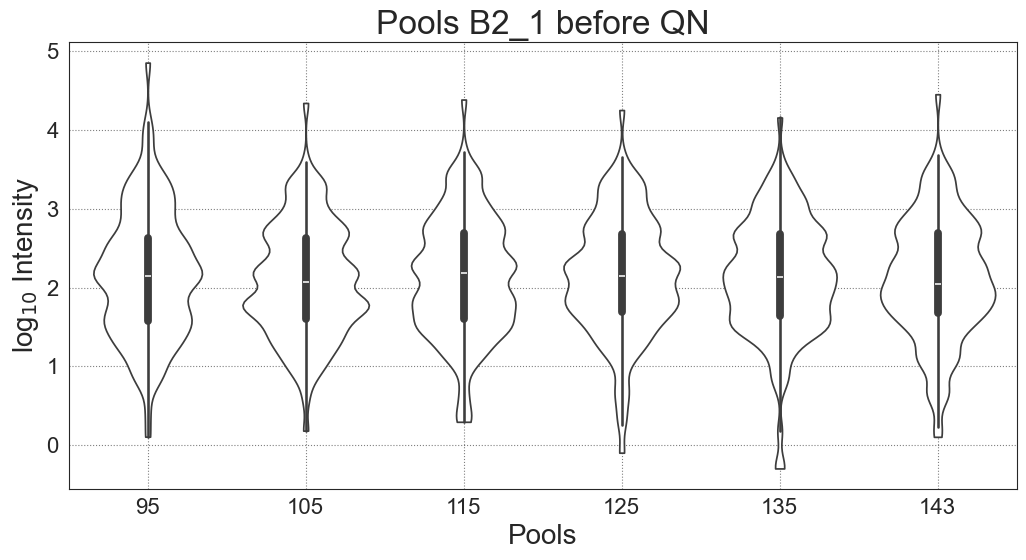

In [11]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log10new2, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Pools', title='Pools {} before QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [12]:
qndf = qnorm.quantile_normalize(log10new2, axis=1)

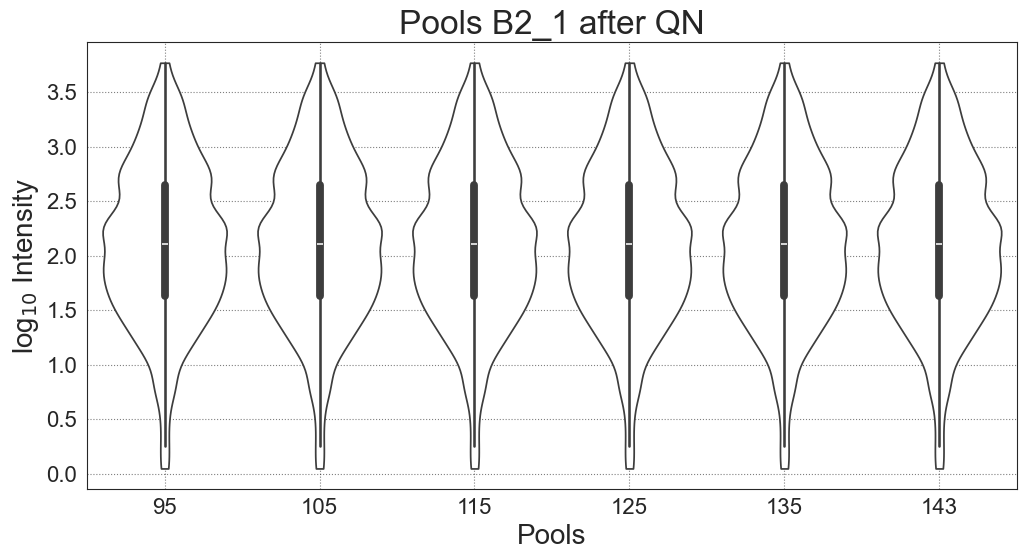

In [13]:
g = seaborn.violinplot(data=qndf, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Pools', title='Pools {} after QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [14]:
new = bdf1.drop(['ID', 'Experiment', 'Experiment ', 'Type', 'Mode', 'Sample ID', 'Treatment', 'TIME', 'BATCH'], axis=1) # oh yes
new.set_index('Injection order', inplace=True)
new2 = new.transpose()
log10new2 = numpy.log10(new2)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_1769/1237597952.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10)


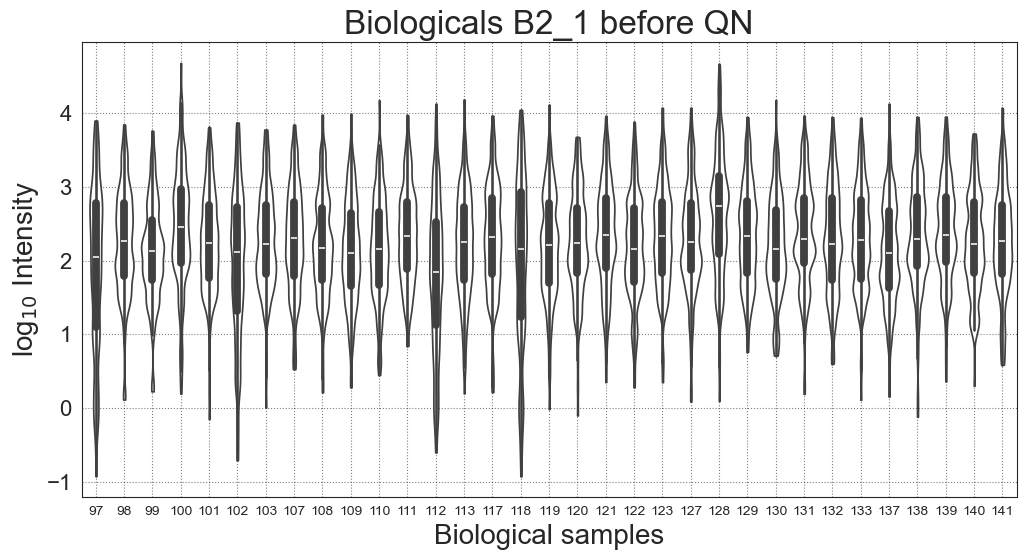

In [15]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log10new2, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Biological samples', title='Biologicals {} before QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [16]:
qndf = qnorm.quantile_normalize(log10new2, axis=1)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_1769/798987564.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10)


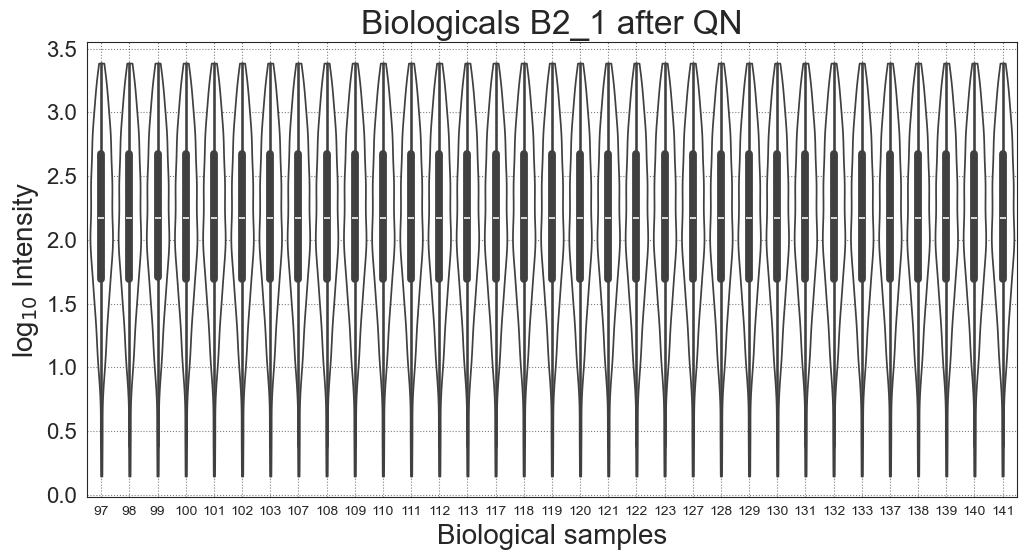

In [17]:
seaborn.set_style("white")
g = seaborn.violinplot(data=qndf, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Biological samples', title='Biologicals {} after QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# Work with both biologicals and pools

In [18]:
new = bdf.drop(['ID', 'Experiment', 'Experiment ', 'Type', 'Mode', 'Sample ID', 'Treatment', 'TIME', 'BATCH'], axis=1) # oh yes
new.set_index('Injection order', inplace=True)
new2 = new.transpose()
log10new2 = numpy.log10(new2)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_1769/2238371905.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10, rotation=30)


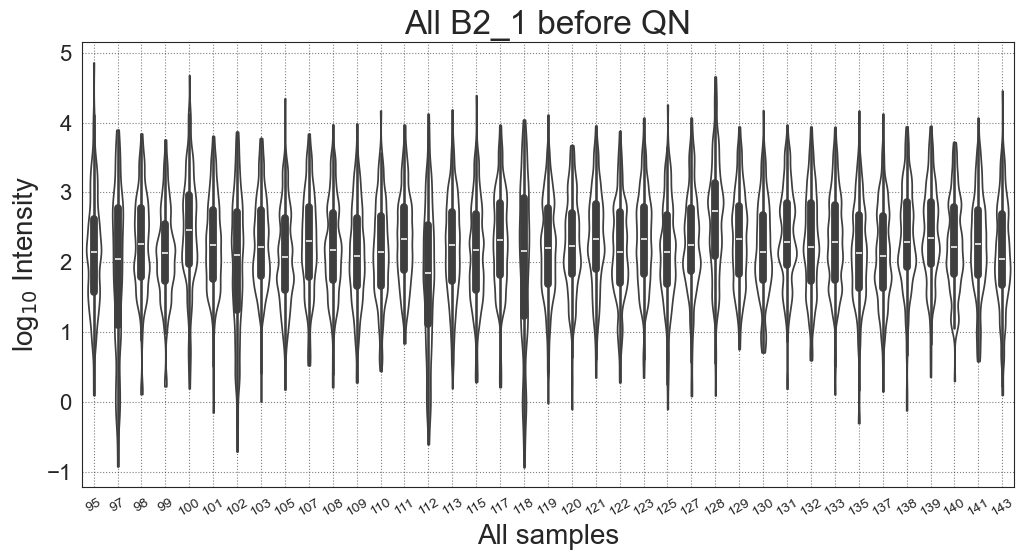

In [19]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log10new2, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='All samples', title='All {} before QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10, rotation=30)

# left are 376, 374, 371, 392, 384, 382
#matplotlib.pyplot.plot([9, 12, 14, 18, 20, 26], [-1, -1, -1, -1, -1, -1], 'o', color='skyblue', ms=12, alpha=1/2)
# B11 fails are 9, 12, 14, 18, 20, 26, same as here

# top are 328, 331 and 325
#matplotlib.pyplot.plot([33, 36, 38], [-1, -1, -1], 'o', color='gold', ms=12, alpha=1/2)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [20]:
qndf = qnorm.quantile_normalize(log10new2, axis=1)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_1769/1365091522.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10)


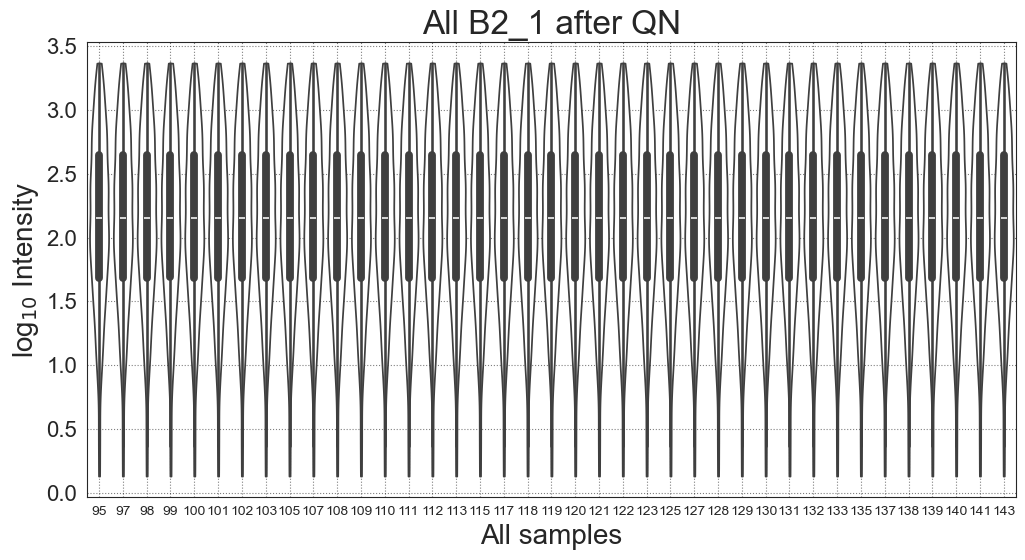

In [21]:
seaborn.set_style("white")
g = seaborn.violinplot(data=qndf, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='All samples', title='All {} after QN'.format(selected_batch))
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# do a histogram of intensities

20
95 126 0.13129401568514634 3.368290869734974
97 126 0.13129401568514634 3.368290869734974
98 126 0.13129401568514634 3.368290869734974
99 126 0.13129401568514634 3.368290869734974
100 126 0.13129401568514634 3.368290869734974
101 126 0.13129401568514634 3.368290869734974
102 126 0.13129401568514634 3.368290869734974
103 126 0.13129401568514634 3.368290869734974
105 126 0.13129401568514634 3.368290869734974
107 126 0.13129401568514634 3.368290869734974
108 126 0.13129401568514634 3.368290869734974
109 126 0.13129401568514634 3.368290869734974
110 126 0.13129401568514634 3.368290869734974
111 126 0.13129401568514634 3.368290869734974
112 126 0.13129401568514634 3.368290869734974
113 126 0.13129401568514634 3.368290869734974
115 126 0.13129401568514634 3.368290869734974
117 126 0.13129401568514634 3.368290869734974
118 126 0.13129401568514634 3.368290869734974
119 126 0.13129401568514634 3.368290869734974
120 126 0.13129401568514634 3.368290869734974
121 126 0.13129401568514634 3.36829

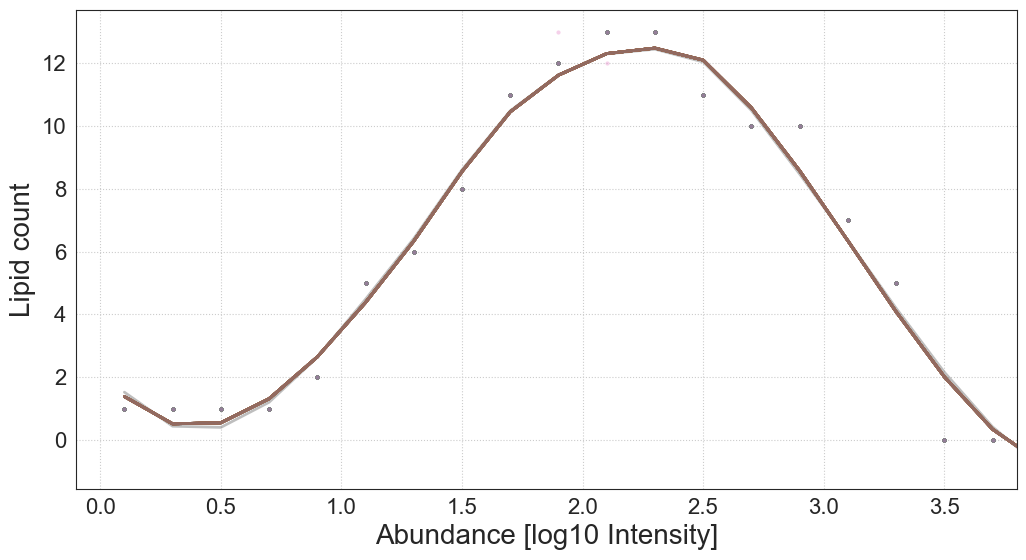

In [22]:
found_max = 4
number_of_bins = 20
print(number_of_bins)

for sample in qndf.columns:
    values = qndf.loc[:, sample]
    print(sample, len(values), numpy.min(values), numpy.max(values))
        
    hist, bin_edges = numpy.histogram(values, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, mec='none')

    yhat = scipy.signal.savgol_filter(hist, 11, 3)
    matplotlib.pyplot.plot(x, yhat, '-', lw=2, alpha=1/2)
    
matplotlib.pyplot.xlabel('Abundance [log10 Intensity]')
matplotlib.pyplot.ylabel('Lipid count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.xlim(-0.1, 3.8)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

(87, 39)
(126, 39)
[0.30897095 0.07989951]
(39, 2)


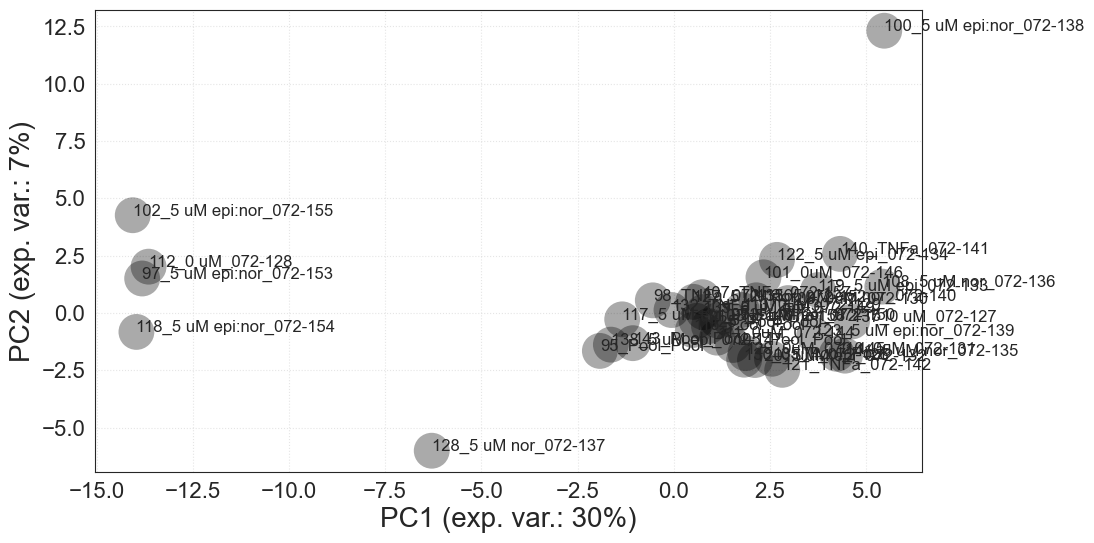

In [23]:
selected = qndf[(qndf.max(axis=1) >= 1.5) & (qndf.max(axis=1) <= 3)]
print(selected.shape)
print(qndf.shape)

# imputation
imputer = sklearn.impute.KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(selected)
iselected = pandas.DataFrame(data=imputed, index=selected.index, columns=selected.columns)

transpose = iselected.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

print(new.shape)
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c='black', marker='o', alpha=1/3, edgecolors='none')
    
    label = iselected.columns[i]
    full_label = df[df['Injection order'] == label]['ID'].values[0]
    matplotlib.pyplot.text(new[i,0], new[i,1], full_label, fontsize=12)
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

matplotlib.pyplot.show()

(126, 39)
[0.32699622 0.08024846]
(39, 2)
unmatched 95_Pool_Pool
unmatched 105_Pool_Pool
unmatched 115_Pool_Pool
unmatched 125_Pool_Pool
unmatched 135_Pool_Pool
unmatched 143_Pool_Pool


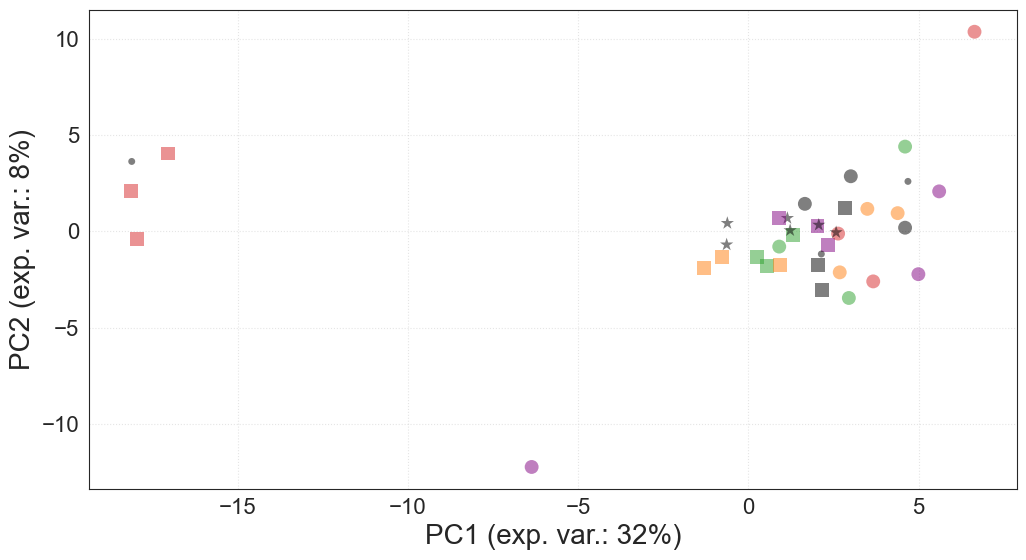

In [24]:
selected = qndf[(qndf.max(axis=1) >= 0) & (qndf.max(axis=1) <= 4)]
print(selected.shape)

# imputation
imputer = sklearn.impute.KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(selected)
iselected = pandas.DataFrame(data=imputed, index=selected.index, columns=selected.columns)

transpose = iselected.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

print(new.shape)
for i in range(len(new)):
    
    label = iselected.columns[i]
    full_label = df[df['Injection order'] == label]['ID'].values[0]
    timepoint = df[df['Injection order'] == label]['TIME'].values[0]
                    
    if timepoint == 4:
        the_marker = 'o'
    elif timepoint == 24:
        the_marker = 's'
    elif timepoint == 0:
        the_marker = '.'
    elif numpy.isnan(timepoint) == True:
        the_marker = '*'
        the_color = 'black'
    else:
        print('unmatched', timepoint, type(timepoint))

    if '0uM' in full_label or '0 uM' in full_label:
        the_color = 'black'
    elif 'epi:nor' in full_label:
        the_color = 'tab:red'
    elif 'epi_' in full_label:
        the_color = 'tab:orange'
    elif 'nor_' in full_label:
        the_color = 'purple'
    elif 'TNF' in full_label:
        the_color = 'tab:green'
    else:
        print('unmatched',full_label)

    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=100, c=the_color, marker=the_marker, alpha=1/2, edgecolors='none')

    # add legend
        
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()

# DELs

In [25]:
rules = ((df['Treatment'] == '0 uM') | (df['Treatment'] == '0uM')) & (df['BATCH'] == selected_batch) & (df['TIME'] == 4) #### ojooooooo BATCH == B11
control_injections = df[rules]['Injection order'].to_list()
print(len(control_injections), control_injections)
rules = (df['Treatment'] == '5 uM epi:nor') & (df['BATCH'] == selected_batch) & (df['TIME'] == 4)
treated_injections = df[rules]['Injection order'].to_list()
print(len(treated_injections), treated_injections)

3 [109, 110, 113]
3 [100, 123, 133]


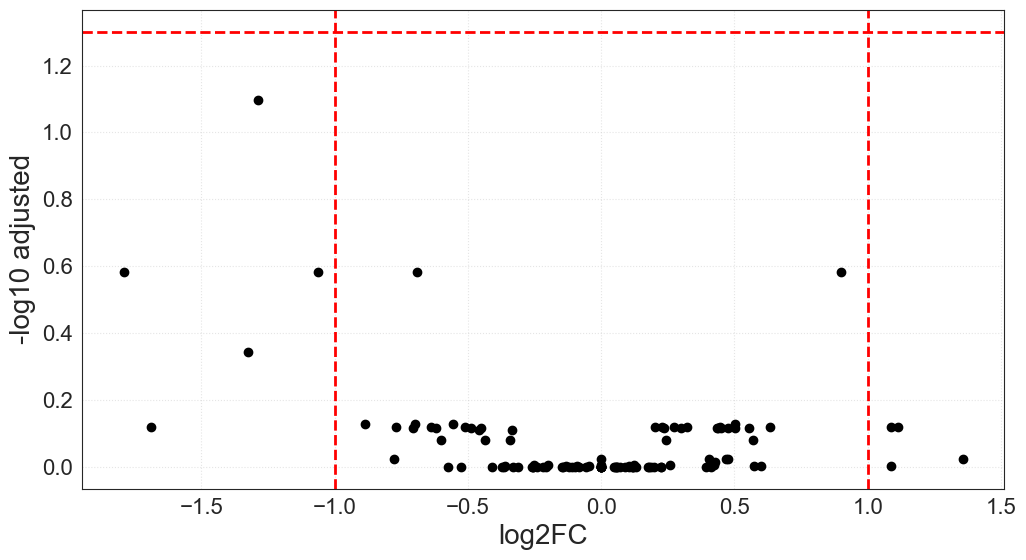

In [26]:
x = []; y = []
p = []
for compound in qndf.index:
    a = qndf.loc[compound, control_injections].values
    b = qndf.loc[compound, treated_injections].values
    results = scipy.stats.ttest_ind(a, b)
    pvalue = results[1]
    if numpy.isnan(pvalue) == True:
        pvalue = 1
    p.append(pvalue)

    value_c = (10**numpy.median(a)) - 1
    value_t = (10**numpy.median(b)) - 1
    diff = numpy.log2(value_t + 1) - numpy.log2(value_c + 1)
    x.append(diff)
    #print(compound, b, a, diff, pvalue)

results = statsmodels.stats.multitest.multipletests(p, alpha=0.05, method='fdr_bh')
adjusted = results[1]
y = -numpy.log10(adjusted)
matplotlib.pyplot.plot(x, y, 'o', color='black')

for i in range(len(adjusted)):
    if adjusted[i] <= 0.05:
        print(i, adjusted[i], x[i], qndf.index[i])

matplotlib.pyplot.axhline(-numpy.log10(0.05), lw=2, color='red', ls='--')
matplotlib.pyplot.axvline(-1, lw=2, color='red', ls='--')
matplotlib.pyplot.axvline(1, lw=2, color='red', ls='--')

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('log2FC')
matplotlib.pyplot.ylabel('-log10 adjusted')
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()   